# Restaurant Order Details EDA | Analysis 

- 1)Which restaurant received the most orders?
- 2)Which restaurant saw most sales?
- 3)Which customer ordered the most?
- 4)When do customers order more in a day?
- 5)Which is the most liked cuisine?6) Which zone has the most sales

In [552]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno
import plotly.express as px 
import plotly.graph_objects as go 
from  plotly.subplots import make_subplots 
from scipy.stats import chi2_contingency
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pd.set_option('display.max_columns' , 500)
plt.rcParams['figure.figsize'] = (20 , 5)

In [450]:
df = pd.read_excel('/Users/sly/Desktop/Resturant_analysis/Notebook/Data Source/Restaurants.xlsx')
df

,RestaurantID,RestaurantName,Cuisine,Zone,Category
0,1,The Cave Hotel,Continental,Zone B,Pro
1,2,SSK Hotel,North Indian,Zone D,Pro
2,3,ASR Restaurant,South Indian,Zone D,Ordinary
3,4,Win Hotel,South Indian,Zone D,Ordinary
4,5,Denver Restaurant,Continental,Zone D,Pro
5,6,Willies,French,Zone D,Pro
6,7,AMN,North Indian,Zone D,Ordinary
7,8,Oslo,French,Zone B,Ordinary
8,9,Excel Restaurant,North Indian,Zone D,Ordinary
9,10,Dave Hotel,South Indian,Zone A,Ordinary


In [451]:
df_ord = pd.read_excel('/Users/sly/Desktop/Resturant_analysis/Notebook/Data Source/Orders.xlsx')
df_ord.sample(5)

,Order ID,Customer Name,Restaurant ID,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
455,OD456,Gopal,11,2022-01-01 23:58:00,3,699,Debit Card,33,2,3
340,OD341,Rifa,12,2022-01-01 12:19:00,6,989,Credit Card,22,5,3
251,OD252,Veer,17,2022-01-01 14:31:00,5,995,Credit Card,46,4,2
248,OD249,David,7,2022-01-01 23:58:00,1,37,Credit Card,50,3,4
236,OD237,Shifa,16,2022-01-01 17:39:00,3,412,Credit Card,39,4,3


In [452]:
(df_ord
 .rename({'Restaurant ID' : 'RestaurantID'}
 
  , axis=1
  ,inplace= True 
 
 )

)

In [453]:
# companing two data frames using merge on resturan id 
df_compained = df.merge(df_ord , how= 'inner' , left_on=  'RestaurantID'   , right_on= 'RestaurantID')

In [454]:
df_compained.sample(5)

,RestaurantID,RestaurantName,Cuisine,Zone,Category,Order ID,Customer Name,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
192,8,Oslo,French,Zone B,Ordinary,OD297,Farhan,2022-01-01 13:39:00,1,65,Credit Card,23,2,4
129,6,Willies,French,Zone D,Pro,OD96,David,2022-01-01 15:22:00,4,300,Cash on Delivery,27,2,2
368,16,Anand Restaurant,African,Zone C,Ordinary,OD164,Rifa,2022-01-01 14:10:00,6,583,Credit Card,49,5,2
3,1,The Cave Hotel,Continental,Zone B,Pro,OD23,Meera,2022-01-01 14:31:00,1,28,Debit Card,29,3,2
327,14,KSR Hotel,Chinese,Zone A,Pro,OD213,Ram,2022-01-01 13:30:00,1,36,Cash on Delivery,10,2,5


In [455]:
df_compained.dtypes

RestaurantID                           int64
RestaurantName                        object
Cuisine                               object
Zone                                  object
Category                              object
Order ID                              object
Customer Name                         object
Order Date                    datetime64[ns]
Quantity of Items                      int64
Order Amount                           int64
Payment Mode                          object
Delivery Time Taken (mins)             int64
Customer Rating-Food                   int64
Customer Rating-Delivery               int64
dtype: object

<AxesSubplot:>

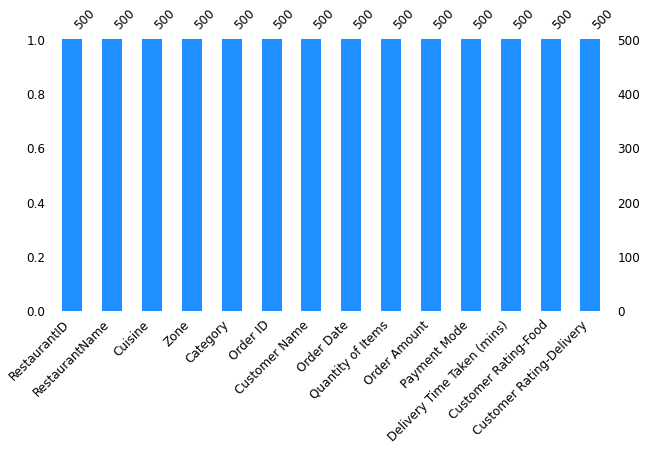

In [456]:
# check Null values
msno.bar(df_compained.isna() ,  color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12 )

# Numerical featuers 

In [457]:
# Checking Outlier , Ploting viloin including box of all numerical features 
# creating fuction in which check ouliers of each numerical features if there subseting ouliers
def checkOutlier(df , col_name , q1 = 0.25 , q3 = 0.75 ):
    q1 = df[col_name].quantile(q1) 
    q3 = df[col_name].quantile(q3)
    iqr = q3 - q1 
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    return lower, upper 


# for looping for each numerical feature name then displying lower and upper range 
outliers = {}
for c in [col for col in df_compained.columns if df_compained[col].dtype !='O' and df_compained[col].dtype !='datetime64[ns]']:
    if c != 'RestaurantID':
        lower , upper = checkOutlier(df_compained , c )
        print("{} : \t lower  {}   |   upper {}" .format(c , round(lower , 2 ), round(upper,2) ))
    # fig , ax = plt.subplots(3 , 2)
        outliers[c] = lower , upper 
    # ax.set_titles(title = ' {} : Lower & Upper' . format(c))
    # .plot.bar()
    # plt.title(feature)
    # plt.show()


Quantity of Items : 	 lower  1.0   |   upper 9.0
Order Amount : 	 lower  -246.5   |   upper 1473.5
Delivery Time Taken (mins) : 	 lower  -9.0   |   upper 71.0
Customer Rating-Food : 	 lower  -1.0   |   upper 7.0
Customer Rating-Delivery : 	 lower  -1.0   |   upper 7.0


In [458]:
# Insights NO Outliers in this dataset but let's plot violin plots
# violin plot for all numerical features 
fig = (px.violin(
        df_compained,
        x = 'Quantity of Items',
        box = True , 
        points= 'all'
        


)

)
fig.show()

In [459]:
fig = (px.violin(
        df_compained,
        x = 'Order Amount',
        box = True , 
        points= 'all'
        


)

)
fig.show()

In [460]:
fig = (px.violin(
        df_compained,
        x = 'Delivery Time Taken (mins)',
        box = True , 
        points= 'all'
        


)

)
fig.show()

In [461]:
fig = (px.violin(
        df_compained,
        x = 'Customer Rating-Food',
        box = True , 
        points= 'all'
        


)

)
fig.show()

In [462]:
'Customer Rating-Delivery'
fig = (px.violin(
        df_compained,
        x = 'Customer Rating-Delivery',
        box = True , 
        points= 'all'
        


)

)
fig.show()

In [463]:
# Histogram distribution of numerica features 
fig = (px.histogram (
        df_compained , 
        x = 'Quantity of Items',
        # marginal= 'violin',
        range_x= [ 0.5, df_compained['Quantity of Items'].max ()+0.5],
        nbins = 20



  )

)

fig.show()

In [464]:
# Histogram distribution of numerica features  maybe categorical include numerics 
fig = (px.histogram (
        df_compained , 
        x = 'Order Amount',
        range_x= [ 0.5, df_compained['Order Amount'].max ()+ 0.5],
        nbins=20
        



  )

)

fig.show()

In [465]:
[col for col in df_compained.columns if df_compained[col].dtype !='O' and df_compained[col].dtype !='datetime64[ns]']

['RestaurantID',
 'Quantity of Items',
 'Order Amount',
 'Delivery Time Taken (mins)',
 'Customer Rating-Food',
 'Customer Rating-Delivery']

In [466]:
fig = (px.histogram (
        df_compained , 
        x = 'Delivery Time Taken (mins)',
        range_x= [ 9.5, df_compained['Delivery Time Taken (mins)'].max ()+0.5],
        nbins=30
        



  )

)

fig.show()

In [467]:
fig = (px.histogram (
        df_compained , 
        x = 'Customer Rating-Food',
        marginal= 'violin',
        range_x= [ 0.5, df_compained['Customer Rating-Food'].max ()+0.5],
        nbins=10
        



  )

)

fig.show()

In [468]:
fig = (px.histogram (
        df_compained , 
        x = 'Customer Rating-Delivery',
        range_x= [ 0.5 , df_compained['Customer Rating-Food'].max ()+0.5],
        nbins= 20
        



  )

)

fig.show()

Corrleation heatmap

In [511]:
# drop RestaurantID 
(df_compained
 .drop('RestaurantID'
 , axis = 1 
 , inplace= True )
)

In [533]:
# drop RestaurantID 
(df_compained
 .drop('Order_day_of_week'        
 , axis = 1 
 , inplace= True )
)
# ['Order_month' , 'Order_day_of_month' ,' Order_day_of_week' ]

['Order_month', 'Order_day_of_month', ' Order_day_of_week']

<AxesSubplot:>

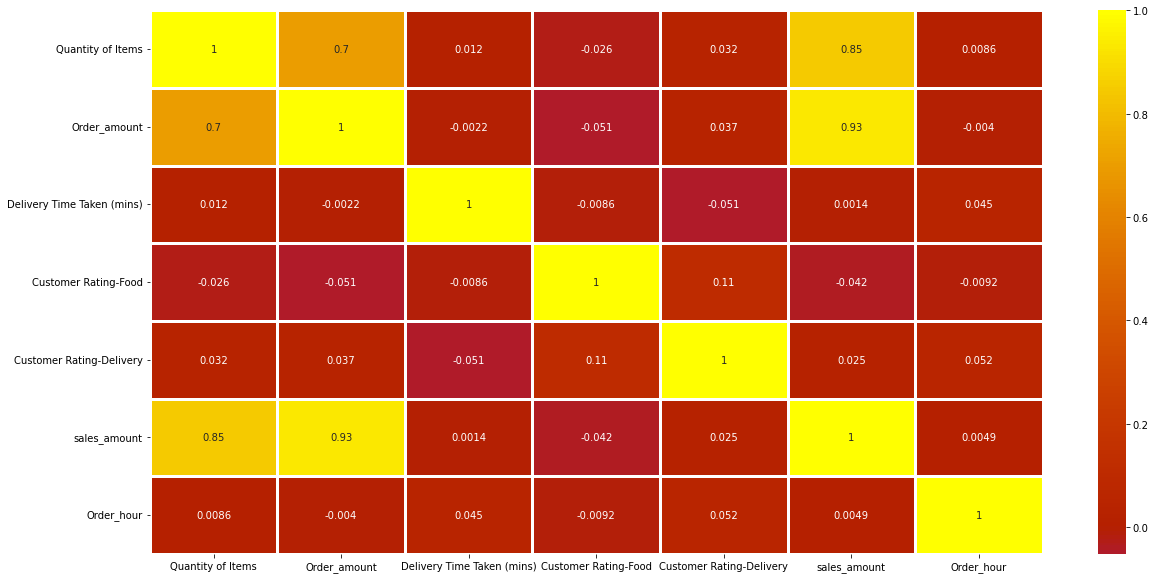

In [538]:
corr = df_compained.corr()
plt.rcParams['figure.figsize'] =(20,10)
sns.heatmap(corr , cmap = 'gnuplot' , annot= True , center = 0 , linewidths = 3 )

# Categorical features

In [469]:
[c for c in df_compained.columns if df_compained[c].dtype == 'O']

['RestaurantName',
 'Cuisine',
 'Zone',
 'Category',
 'Order ID',
 'Customer Name',
 'Payment Mode']

In [470]:
# Categorical Features 
# CHECK FOR CARDINALITY 
# CREATING FUCTION IN WHICH CHECKS CARDINALITY PARTO


def cardinality_parto(df , column) : 
    temp = df[column].value_counts().reset_index()
    temp['Percantage_total'] = temp[column] / temp[column].sum()
    temp['Percantage_Running_total'] = temp[column] / temp[column].cumsum()



    return temp

# RestaurantName
cardinality_parto(df_compained , 'RestaurantName')

,index,RestaurantName,Percantage_total,Percantage_Running_total
0,The Cave Hotel,32,0.064,1.000000
1,Ellora,32,0.064,0.500000
2,Chew Restaurant,31,0.062,0.326316
3,Willies,30,0.060,0.240000
4,Veer Restaurant,29,0.058,0.188312
5,Anand Restaurant,29,0.058,0.158470
6,Ruchi,28,0.056,0.132701
7,Win Hotel,27,0.054,0.113445
8,Zam Zam,25,0.050,0.095057
9,Sam Hotel,25,0.050,0.086806


In [471]:
#Cuisine
cardinality_parto(df_compained , 'Cuisine')

,index,Cuisine,Percantage_total,Percantage_Running_total
0,North Indian,81,0.162,1.000000
1,Chinese,81,0.162,0.500000
2,French,71,0.142,0.304721
3,South Indian,70,0.140,0.231023
4,African,61,0.122,0.167582
5,Belgian,56,0.112,0.133333
6,Continental,55,0.110,0.115789
7,Arabian,25,0.050,0.050000


In [472]:
#Zone
cardinality_parto(df_compained , 'Zone')

,index,Zone,Percantage_total,Percantage_Running_total
0,Zone D,213,0.426,1.000000
1,Zone B,132,0.264,0.382609
2,Zone C,86,0.172,0.199536
3,Zone A,69,0.138,0.138000


In [473]:
cardinality_parto(df_compained , 'Payment Mode')

,index,Payment Mode,Percantage_total,Percantage_Running_total
0,Debit Card,174,0.348,1.000000
1,Cash on Delivery,169,0.338,0.492711
2,Credit Card,157,0.314,0.314000


In [474]:
cardinality_parto(df_compained , 'Customer Name')

,index,Customer Name,Percantage_total,Percantage_Running_total
0,Srini,34,0.068,1.000000
1,Revandh,30,0.060,0.468750
2,Ram,29,0.058,0.311828
3,Meera,29,0.058,0.237705
4,Suhaib,28,0.056,0.186667
5,Rifa,28,0.056,0.157303
6,Veer,26,0.052,0.127451
7,Swamy,25,0.050,0.109170
8,Farhan,25,0.050,0.098425
9,David,24,0.048,0.086331


- Order_year of per orders numbers line chart 
- Order_month of the year numbers of orders 
- Order_hour of the day number of orders
- Order_day_of_month of the month per orders numbers 
- Order_day_of_week of the week per orders numbers


In [491]:
# df_compained['Order Hour']  =  df_compained['Order Date'].dt.hour
df_compained = (df_compained
  # .rename(columns= {'Order Date' : 'Order_date' } , inplace=True )
  .assign(Order_year = lambda df_compained_ : df_compained_.Order_date.dt.year,
          Order_month =  lambda df_compained_ : df_compained_.Order_date.dt.month ,
          Order_hour = lambda df_compained_ : df_compained_.Order_date.dt.hour,
          Order_day_of_month = lambda df_compained_ : df_compained_.Order_date.dt.day ,
          Order_day_of_week = lambda df_compained_ : df_compained_.Order_date.dt.dayofweek)
)

In [492]:
df_compained.rename(columns= {'Order Amount' : 'Order_amount' } , inplace=True )

# Aggregations 

In [493]:
(df_compained
 .groupby(df_compained.Order_year)
 .mean()
)

,RestaurantID,Quantity of Items,Order_amount,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery,sales_amount,Order_month,Order_hour,Order_day_of_month,Order_day_of_week
Order_year,,,,,,,,,,,
2022,10.672,4.652,598.142,30.542,3.362,2.992,3119.224,1.0,16.0,1.0,5.0


In [494]:
(df_compained
 .groupby(df_compained.Order_year)
 .Order_amount 
 .mean()
)

Order_year
2022    598.142
Name: Order_amount, dtype: float64

# Insights: Look Like this data sets invalid year just for 2022 

In [495]:
hours2_orders = (df_compained
 .groupby(pd.Grouper(key = 'Order_date' , freq='2h'))
   ['Order_amount' ] 

 .sum()
#  .plot()
 
)
fig = px.line (
  hours2_orders ,
  x = hours2_orders.index , 
  y = 'Order_amount',
  title = '2 Hours Frequency VS Number Of Orders'
)
fig.update_xaxes(title = 'Hours')
fig.update_yaxes(title = 'Number Of Orders')
fig.show()

# When do customers order more in a day?

In [549]:
hour_orders = (df_compained
 .groupby(pd.Grouper(key = 'Order_date' , freq='H'))
   ['Order_amount' ] 

 .sum()
  
 
)
hour_orders = hour_orders.dropna(how = 'all')
# hour_orders.plot(figsize=(20,5))



fig = px.line(hour_orders,
              x = hour_orders.index , 
              y = 'Order_amount'
                ,title = 'Hourly Frequency VS Number Of Orders')

fig.update_xaxes(title = 'Hours')
fig.update_yaxes(title = 'Number Of Orders')
fig.show()

# Q1 : Which restaurant received the most orders  

In [543]:
most_resturans_rec_orders = (df_compained
 .groupby('RestaurantName')
 .sum()
 ['Order_amount']
 .reset_index()
 

)
most_resturans_rec_orders = most_resturans_rec_orders.sort_values(by = 'Order_amount' , ascending = False)


# Ploting the resturans by number of orders
fig  = px.bar(
    most_resturans_rec_orders ,
    x = 'RestaurantName',
    y = 'Order_amount',
    text_auto='.2s', hover_name="RestaurantName",color_discrete_sequence=[
                 px.colors.qualitative.Alphabet[6],
                 px.colors.qualitative.Alphabet[11],
               px.colors.qualitative.Plotly[2],
                 px.colors.qualitative.Plotly[7],
               px.colors.qualitative.G10[5]]
    
 ,   title= 'Most Restaurants By number of Orders' )

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_xaxes(title = 'Restaurant Name')
fig.update_yaxes(title = 'Number Of Orders')
fig.show()

# Q2 : Which resturants by low numbers of orders amounts 

In [544]:
most_resturans_rec_orders = (df_compained
 .groupby('RestaurantName')
 .sum()
 ['Order_amount']
 .reset_index()
 

)
most_resturans_rec_orders = most_resturans_rec_orders.sort_values(by = 'Order_amount' , ascending= True)


# Ploting the resturans by number of orders
fig  = px.bar(
    most_resturans_rec_orders ,
    x = 'RestaurantName',
    y = 'Order_amount',
    text_auto='.2s',hover_name="RestaurantName",color_discrete_sequence=[
                 px.colors.qualitative.Alphabet[6],
                 px.colors.qualitative.Alphabet[11],
               px.colors.qualitative.Plotly[2],
                 px.colors.qualitative.Plotly[7],
               px.colors.qualitative.G10[5]]
    ,
      title= 'Loweset Restaurants By number of Orders')

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_xaxes(title = 'Restaurant Name')
fig.update_yaxes(title = 'Number Of Orders')
fig.show()

# Q3 : Which Restaurant saw most sales?

In [545]:
# sales of items multiplied by order amounts sales amount of items overall order amounts 
df_compained['sales_amount'] = df_compained['Quantity of Items'] * df_compained['Order_amount']

most_sales = (df_compained
 .groupby('RestaurantName')
 .sum()
 ['sales_amount']
 
 .reset_index()

)

most_sales = most_sales.sort_values(by = 'sales_amount' , ascending = False)

fig = px.histogram(
    most_sales,
    x= 'RestaurantName',
    y = 'sales_amount',
    title = 'Most Sales of Items Per Restaurants',
    text_auto='.2s', hover_name="RestaurantName",color_discrete_sequence=[
                 px.colors.qualitative.Alphabet[6],
                 px.colors.qualitative.Alphabet[11],
               px.colors.qualitative.Plotly[2],
                 px.colors.qualitative.Plotly[7],
               px.colors.qualitative.G10[5]]
    
    
)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_xaxes(title = 'Restaurants')
fig.update_yaxes(title = 'Sales of Items')
fig.show()

# Q4 : Which customer ordered the most 

In [546]:
# customer ordered the most?
most_customer_ordered = (df_compained
 .groupby('Customer Name')
 ['Order_amount']
 .sum()
 .reset_index()

)

most_customer_ordered = most_customer_ordered.sort_values(by = 'Order_amount' , ascending = False)

fig = px.histogram(
    most_customer_ordered,
    x= 'Customer Name',
    y = 'Order_amount',
    title = 'Customers ordered the most? ',
    text_auto='.2s', hover_name="Customer Name",color_discrete_sequence=[
                 px.colors.qualitative.Alphabet[6],
                 px.colors.qualitative.Alphabet[11],
               px.colors.qualitative.Plotly[2],
                 px.colors.qualitative.Plotly[7],
               px.colors.qualitative.G10[5]]
    
)
 
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_xaxes(title = 'Customer')
fig.update_yaxes(title = 'Number Of Orderes ')
fig.show()

# Which is the most liked cuisine

In [547]:
# Hight ratings by each cusisine repersinting most liked cusisine
most_liked_cusisine= (df_compained
 .groupby(['Cuisine'])
 .sum()
 [ 'Customer Rating-Food']
 .reset_index()
 
  
)


most_liked_cusisine = most_liked_cusisine.sort_values('Customer Rating-Food' , ascending = False) 



fig = px.pie(most_liked_cusisine[:3] ,
            names='Cuisine' ,
            values='Customer Rating-Food' ,
            title= 'Most liked Cuisine')


fig.show()

# Which zone has the most sales

In [502]:
most_zone_sales = (df_compained
 .groupby(['Zone' , 'Order_hour'])
 .sum()
 ['sales_amount']
 
 .reset_index()

)

most_zone_sales = most_zone_sales.sort_values(by = 'sales_amount' , ascending = False)

fig = px.bar(
    most_zone_sales,
    x= 'Zone',
    y = 'sales_amount',
    title = 'Most Sales of Items Per Zone',
    color= 'Order_hour',
    color_continuous_scale='Bluered_r'
    

    
)

# color="lifeExp", orientation="h",
#              color_continuous_scale='Bluered_r', hover_name="country

fig.update_xaxes(title = 'Zone')
fig.update_yaxes(title = 'Sales of Items Over Order Hours')
fig.show()